In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [48]:
response = requests.get('https://www.politifact.com/truth-o-meter/statements/')
soup = BeautifulSoup(response.text,'html.parser')

In [49]:
num_of_pages = int(soup.find(class_='step-links__current').get_text().split()[-1])

In [50]:
sources = []
texts = []
categories = []
dates = []
labels = []
explanations = []

for i in tqdm(range(1,num_of_pages+1)):
    response = requests.get(f'https://www.politifact.com/truth-o-meter/statements/?page={i}')
    soup = BeautifulSoup(response.text,'html.parser')
    
    for source in soup.find_all(class_='statement__source'):
        sources.append(source.get_text().strip())

    for source in soup.find_all(class_='statement__text'):
        texts.append(source.get_text().strip())

    for source in soup.find_all(class_='statement__edition'):
        try:
            categories.append(source.find('a').get_text().split('PolitiFact')[1].strip())
        except IndexError:
            categories.append(source.find('a').get_text().split('—')[1].strip())

    for source in soup.find_all(class_='statement__edition'):
        dates.append(source.find(class_='article__meta').get_text().split('on ')[1].strip())

    for source in soup.find_all(class_='meter'):
        labels.append(source.find('img')['alt'])
        explanations.append(source.get_text().strip())

In [58]:
df = pd.DataFrame({'Source': sources, 'Text': texts, 'Category': categories, 'Date': dates,'Explanation': explanations, 'Label': labels})

In [59]:
df

,Source,Text,Category,Date,Explanation,Label
0,Philip Van Cleave,"U.S. and Virginia murders are ""usually gangban...",Virginia,"Thursday, January 9th, 2020",No evidence,False
1,Facebook posts,Says guns are required to be registered.,Facebook fact-checks,"Wednesday, January 8th, 2020","No national gun registry, few states require r...",Mostly False
2,Facebook posts,Says a video shows Iranian rockets being launc...,Facebook fact-checks,"Wednesday, January 8th, 2020",It's at least a year old,False
3,Viral image,"A man at ""the storming of the U.S. embassy"" in...",Facebook fact-checks,"Wednesday, January 8th, 2020",He accompanied the Iraqi prime minister,True
4,Facebook posts,Says a series of photos show Iranian rockets b...,Facebook fact-checks,"Wednesday, January 8th, 2020",Beware of false images and videos,False
...,...,...,...,...,...,...
16870,Tom Tancredo,"""For every single scientist that tells you (gl...",National,"Tuesday, June 12th, 2007",Most scientists say humans cause warming,False
16871,John Edwards,"""We now have the greatest income inequality si...",National,"Tuesday, June 12th, 2007",Economists find large income gap,True
16872,Bill Richardson,"""New Mexico was 46th in teacher pay (when he w...",National,"Tuesday, June 12th, 2007","Correct, but stats came from friendly group",Mostly True
16873,Tommy Thompson,"""Tommy Thompson is the father of welfare refor...",National,"Friday, June 1st, 2007",Thompson was a leader in welfare reform,True


In [60]:
df.to_csv('politifact.csv')

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

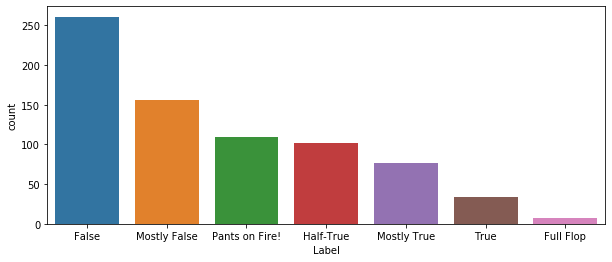

In [87]:
plt.figure(figsize=(10,4))
sns.countplot(df[df['Source']=='Donald Trump']['Label'], order = df[df['Source']=='Donald Trump']['Label'].value_counts().index)

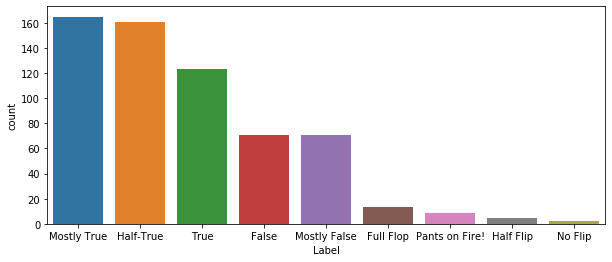

In [88]:
plt.figure(figsize=(10,4))
sns.countplot(df[df['Source']=='Barack Obama']['Label'], order = df[df['Source']=='Barack Obama']['Label'].value_counts().index)

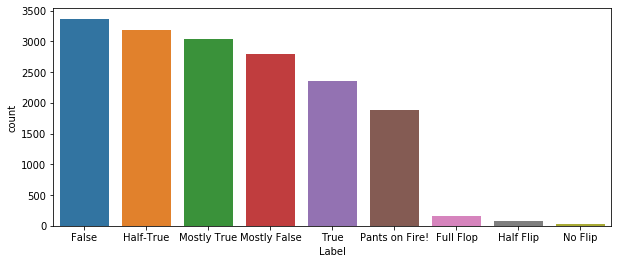

In [89]:
plt.figure(figsize=(10,4))
sns.countplot(df['Label'], order = df['Label'].value_counts().index)

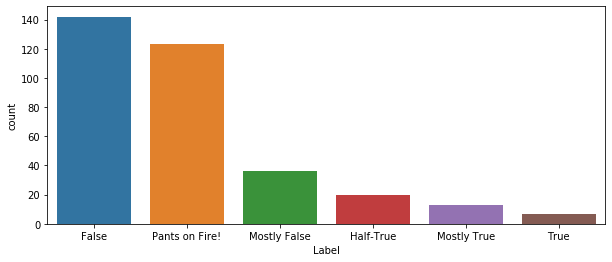

In [91]:
plt.figure(figsize=(10,4))
sns.countplot(df[df['Source']=='Facebook posts']['Label'], order = df[df['Source']=='Facebook posts']['Label'].value_counts().index)